In [1]:
import pandas as pd
import os
from os.path import curdir

In [2]:
xl_path = os.path.join(curdir,'Data',"MMA_860_Grocery_Data.xlsx")
df_xl = pd.read_excel(xl_path,sheet_name=0,header='infer',index_col="Obs")
df_xl.head()

,Grocery_Bill,Family_Income,Family_Size,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet,N_Adults
Obs,,,,,,,,,
1,357.73,142141,4,3,15,0,2,1,2
2,276.84,145916,2,1,4,0,0,0,2
3,197.92,86185,1,2,14,0,0,0,1
4,315.75,145998,3,1,8,0,1,0,2
5,202.89,79341,1,2,19,1,0,0,1


# 1. A scatter plot with grocery bill and distance to store.

In [3]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

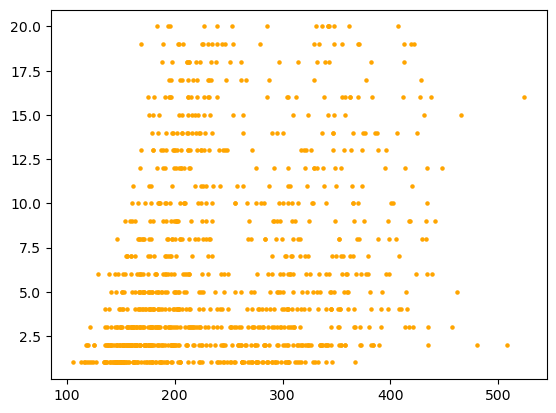

In [4]:
plt.scatter(df_xl['Grocery_Bill'], df_xl['Distance_to_Store'], s=5, c='orange')
plt.show

# 2. A box plot of family income broken out by number of adults. 

<function matplotlib.pyplot.show(close=None, block=None)>

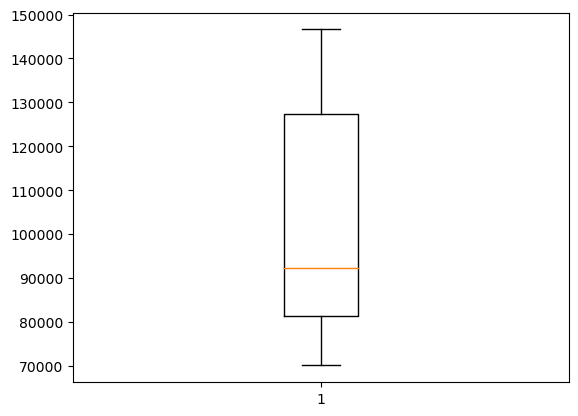

In [5]:
plt.boxplot(df_xl['Family_Income']) # based on all data
plt.show

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='N_Adults', ylabel='Family_Income'>

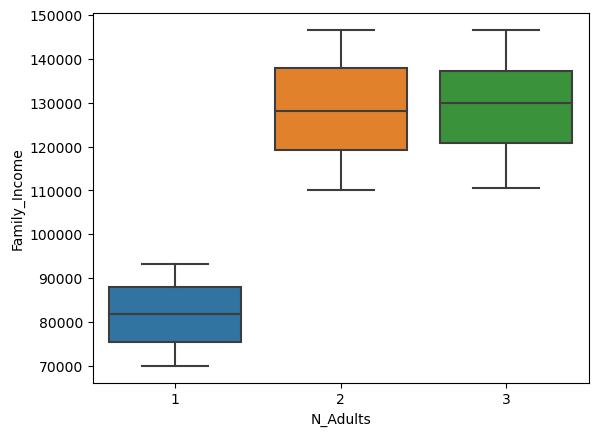

In [7]:
sns.boxplot(x=df_xl['N_Adults'],y=df_xl['Family_Income'],data=df_xl)

<AxesSubplot:title={'center':'Family_Income'}, xlabel='N_Adults'>

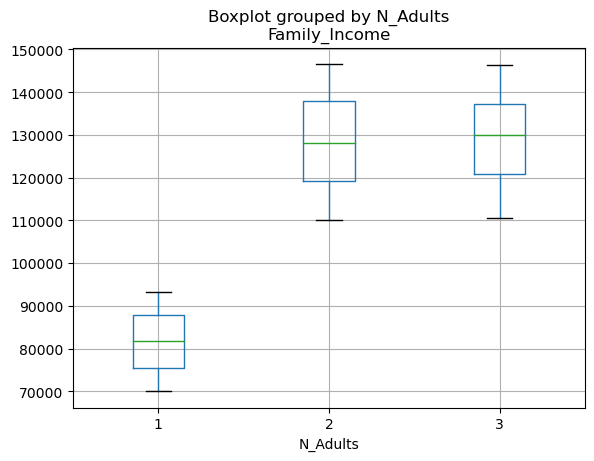

In [8]:
df_xl.boxplot(by='N_Adults', column='Family_Income') # Alex's solution

# 3. A histogram of family income.

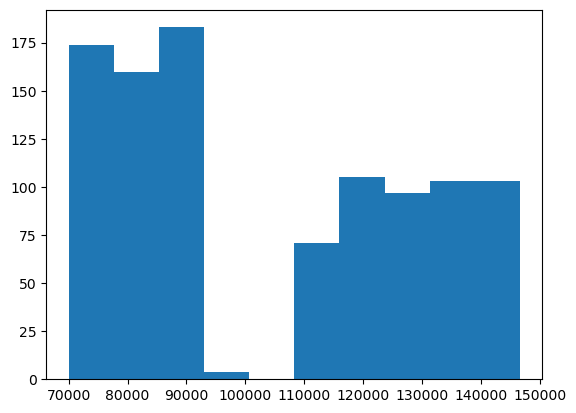

In [9]:
plt.hist(df_xl['Family_Income'])
plt.show()

# 4. A bar chart showing the total sales by family size.

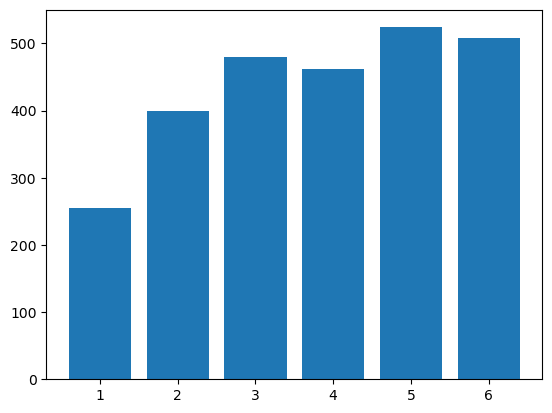

In [10]:
plt.bar(df_xl['Family_Size'], df_xl['Grocery_Bill'])
plt.show()

In [11]:
#ts_by_fs = df_xl.groupby(['Family_Size']).sum().reset_index()
ts_by_fs = df_xl.groupby(['Family_Size'],as_index=False).sum()
ts_by_fs

,Family_Size,Grocery_Bill,Family_Income,N_Vehicles,Distance_to_Store,Vegetarian,N_Children,Family_Pet,N_Adults
0,1,81110.82,37011524,859,3018,28,0,67,453
1,2,65584.33,29323051,453,1725,21,68,43,438
2,3,32940.52,13748163,209,605,6,89,19,232
3,4,29450.41,11322072,182,617,6,168,18,184
4,5,33307.24,11729813,183,600,2,265,12,190
5,6,3348.78,998869,16,44,0,24,0,24


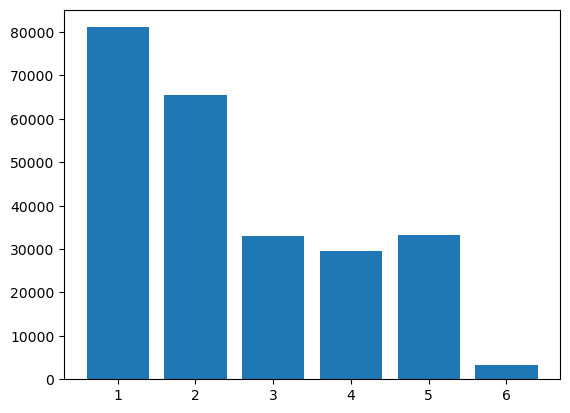

In [12]:
plt.bar(ts_by_fs['Family_Size'], ts_by_fs['Grocery_Bill'])
plt.show()

In [13]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandasql

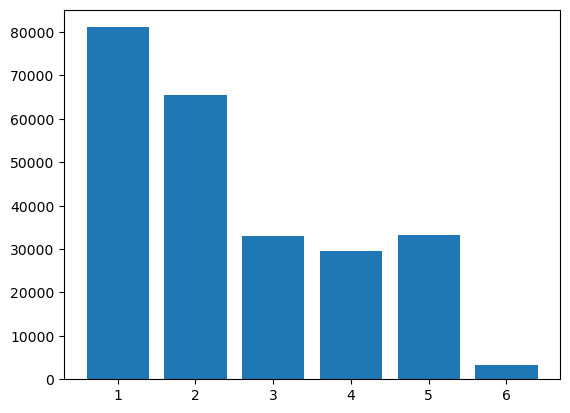

In [15]:
# Alex's solution
new_df = pandasql.sqldf("SELECT Family_Size, SUM(Grocery_Bill) FROM df_xl GROUP BY Family_Size;")

plt.bar(new_df['Family_Size'], new_df['SUM(Grocery_Bill)'])
plt.show()

# 5. The best way you can come up with to visualize family income, grocery bill, and vegetarians in one chart. 

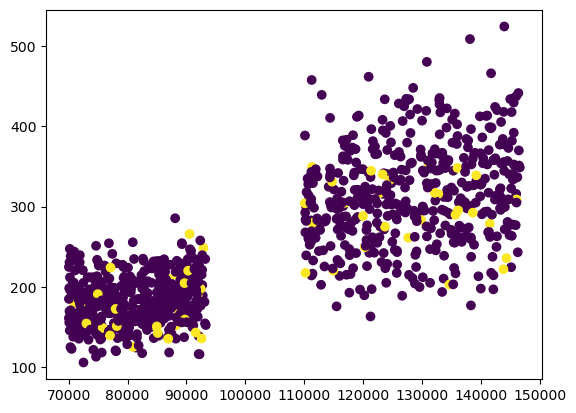

In [16]:
plt.scatter(df_xl['Family_Income'], df_xl['Grocery_Bill'], c=df_xl['Vegetarian'])
plt.show()